# Single Neuron

In [1]:
import numpy as np, matplotlib.pyplot as plt

## Linear Regression

Values based on Professor Bryce's "Deep Learning" lecture 04 on Gradient Descent

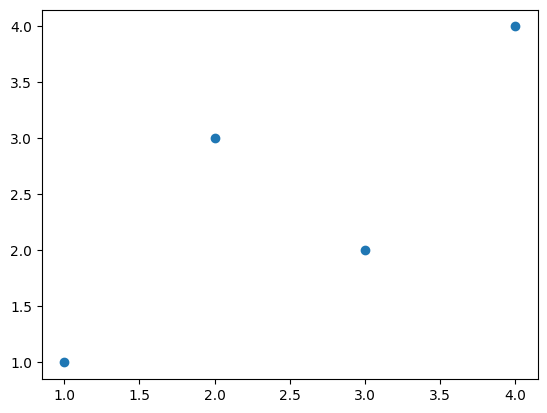

In [52]:
# Generate a random dataset with 1000 points (x, y):
NUM_POINTS: int = 4
dataset = np.array([[1, 1], [2, 3], [3, 2], [4, 4]])
x, y = dataset[:, 0], dataset[:, 1]
plt.scatter(x, y) #c=np.random.rand(NUM_POINTS, 3), alpha=0.5)
plt.show()

In [53]:
class LinearNeuron:
    def __init__(self, lr: float, w: float, b: float, epochs: int = 5) -> None:
        self.lr: float = lr
        self.w: float = w
        self.b: float = b
        self.epochs: int = epochs

    def forward(self, x: float) -> float:
        return self.w * x + self.b

    def loss(self, y: float, y_hat: float) -> float:
        return sum((y - y_hat)**2)

    def gradient(self, y: float, y_hat: float, x: float) -> float:
        return (sum(e := -2 * (y - y_hat)), sum(e*x))

    def train(self, x: float, y: float) -> None:
        print(f"Initial: w = {self.w}, b = {self.b}")
        for e in range(self.epochs):
            
            # Compute the predicted output given current parameters
            y_hat = self.forward(x)

            # Compute the loss between the predicted and actual output
            loss = self.loss(y, y_hat)

            # Update the parameters using gradient descent
            gradient = self.gradient(y, y_hat, x)
            self.w -= self.lr * gradient[1]
            self.b -= self.lr * gradient[0]

            # Print information about the epoch
            print(f"Epoch {e+1}: Loss = {loss:.3f}, w = {self.w:.3f}, b = {self.b:.3f}")
        return loss

Initial: w = 10, b = -10
Epoch 1: Loss = 1050.000, w = 6.580, b = -11.000
Epoch 2: Loss = 203.652, w = 5.412, b = -11.236
Epoch 3: Loss = 108.322, w = 4.992, b = -11.220
Epoch 4: Loss = 95.810, w = 4.821, b = -11.120
Epoch 5: Loss = 92.472, w = 4.732, b = -10.995
Epoch 6: Loss = 90.192, w = 4.672, b = -10.862
Epoch 7: Loss = 88.075, w = 4.621, b = -10.727
Epoch 8: Loss = 86.019, w = 4.574, b = -10.593
Epoch 9: Loss = 84.014, w = 4.528, b = -10.461
Epoch 10: Loss = 82.057, w = 4.483, b = -10.329


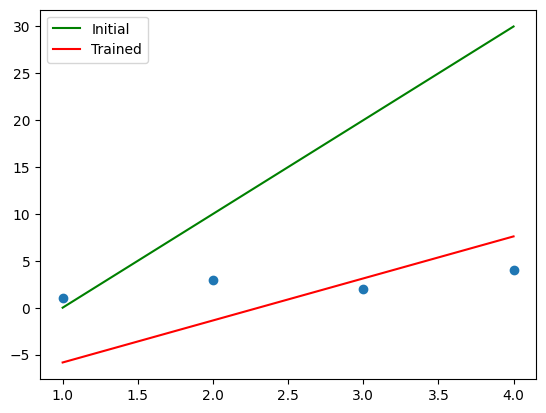

In [54]:
w, b = 10, -10
N = LinearNeuron(lr=0.01, w=w, b=b, epochs=10)
N.train(x, y)

plt.scatter(x, y)
plt.plot(x, w*x + b, c='green', label='Initial')
plt.plot(x, N.forward(x), c='red', label='Trained')
plt.legend()
plt.show()

## Logistic Regression (Classification)

In [12]:
class LogitRegression:
    def __init__(self, lr, W, b, epochs):
        self.lr = lr
        self.epochs = epochs
        self.W = W
        self.b = b
        
    def sigmoid(self, X):
        return 1. / (1. + np.exp(-X))
    
    def accuracy(self, y_hat, y):
        return np.mean(y_hat == y)
    
    def fit(self, X, y):
        samples, _ = X.shape
        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.W) + self.b
            y_hat = self.sigmoid(linear_output)

            dw = (1 / samples) * np.dot(X.T, (y_hat - y))
            db = (1 / samples) * np.sum(y_hat - y)

            self.W -= self.lr * dw
            self.b -= self.lr * db

            loss = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
            print(f"Epoch {epoch+1}: Loss = {loss:.3f}, W = {self.W}, b = {self.b}")
        return self.W, self.b

    
    def predict(self, X):
        y_hat = self.sigmoid(np.dot(X, self.W) + self.b)
        return np.where(y_hat >= 0.5, 1, 0)
    
    def accuracy(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y_hat == y)
        return np.mean(y_hat == y)

In [47]:
X = np.array([[1, 2], [2, 1], [2, 3], [3, 2], [4, 1], [4, 2]])
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Normalize features
y = np.array([0, 0, 1, 1, 0, 1])
W, b = np.array([-2, -2], dtype=float), 10

N = LogitRegression(lr=0.1, W=W, b=b, epochs=500)
pred_W, pred_b = N.fit(X, y)
print(f"Final parameters: W = {pred_W}, b = {pred_b}")
print(f"Accuracy: {N.accuracy(X, y):.2f}")

Epoch 1: Loss = 6.027, W = [-1.98491051 -1.96360524], b = 9.950023528949066
Epoch 2: Loss = 5.987, W = [-1.96982053 -1.92721048], b = 9.900047506184979
Epoch 3: Loss = 5.947, W = [-1.95473005 -1.89081573], b = 9.850071947368187
Epoch 4: Loss = 5.906, W = [-1.93963907 -1.854421  ], b = 9.800096868852934
Epoch 5: Loss = 5.866, W = [-1.92454755 -1.81802628], b = 9.750122287728146
Epoch 6: Loss = 5.826, W = [-1.90945548 -1.78163159], b = 9.700148221861209
Epoch 7: Loss = 5.785, W = [-1.89436285 -1.74523692], b = 9.650174689944858
Epoch 8: Loss = 5.745, W = [-1.87926964 -1.70884229], b = 9.600201711547419
Epoch 9: Loss = 5.704, W = [-1.86417583 -1.67244769], b = 9.550229307166655
Epoch 10: Loss = 5.664, W = [-1.84908139 -1.63605315], b = 9.500257498287526
Epoch 11: Loss = 5.624, W = [-1.83398631 -1.59965865], b = 9.450286307444133
Epoch 12: Loss = 5.583, W = [-1.81889057 -1.56326422], b = 9.400315758286194
Epoch 13: Loss = 5.543, W = [-1.80379413 -1.52686986], b = 9.350345875650415
Epoch 14

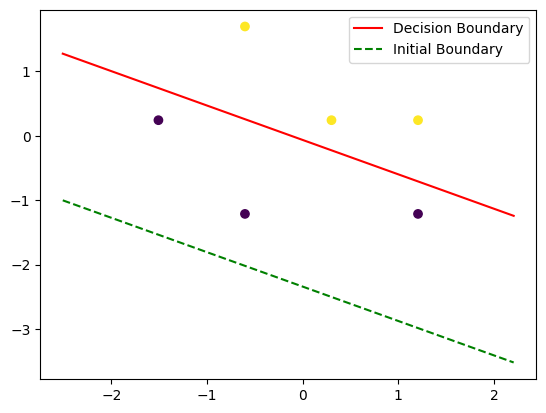

In [48]:
x1_range = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2_boundary = -(pred_W[0] * x1_range + pred_b) / pred_W[1]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1_range, x2_boundary, 'r-', label='Decision Boundary')
plt.plot(x1_range, -(W[0] * x1_range + b) / W[1], 'g--', label='Initial Boundary')
plt.legend()
plt.show()
